In [92]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [93]:
Data = pandas.read_csv('PCGF_Performance.csv')
Data.Shower_Class = Data.Shower_Class.apply(lambda x: x.split("'")[1])
# Drop data where class = Empty
Data.drop(Data[Data.Shower_Class == 'Empty'].index, inplace=True)
print(f'Total Events: {len(Data)}') 

Total Events: 11805


In [94]:
Data.head()

,SDP_SpaceAngle_Diff,Chi0_Diff,Rp_Diff,Axis_SpaceAngle_Diff,Rec_Level,Shower_Class
0,109.913000,-144.668000,-913.45900,0.000000,3,Muon + Noise
1,1.095910,-14.679100,178.03000,14.937400,10,Shower Candidate
2,0.055860,0.497952,-13.41220,0.521075,10,Shower Candidate
3,0.049994,0.215505,-1.24033,0.247076,10,Shower Candidate
4,1.044680,3.353860,-49.72620,2.552590,10,Shower Candidate


In [95]:
Classes_shower = [thing for thing in Data.Shower_Class.unique() if "Shower" in thing]
Classes_noise  = [thing for thing in Data.Shower_Class.unique() if not "Shower" in thing]
Classes_all    = Classes_shower + Classes_noise
print(Classes_shower)
print(Classes_noise)

['Shower Candidate', 'Close Shower', 'Horizontal Shower']
['Muon + Noise', 'Long Muon', 'Noise', 'Muon', 'Large Event']


In [96]:
colors = plt.cm.Wistia(np.linspace(0, 1, len(Classes_all)))

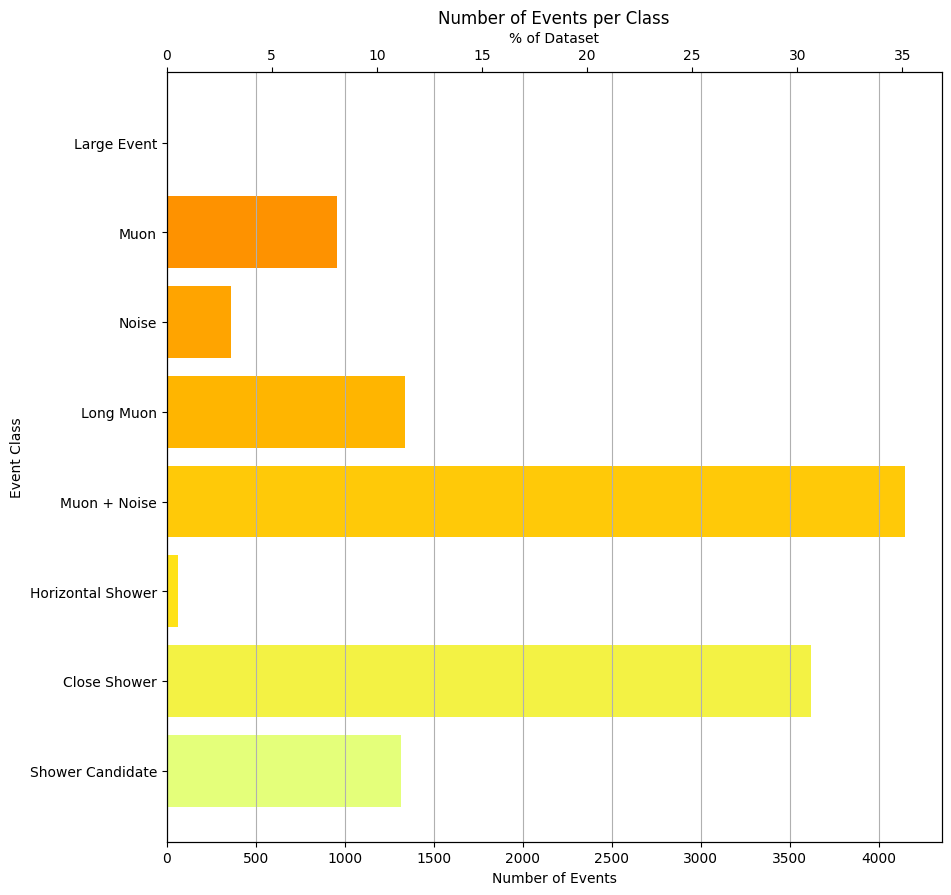

In [112]:
# Plot the number of different event classes
Classes_counts = [len(Data[Data.Shower_Class == thing]) for thing in Classes_all]
Total_count = sum(Classes_counts)
Classes_percent = [count / Total_count * 100 for count in Classes_counts]

fig, ax1 = plt.subplots(figsize=(10, 10))
ax2 = ax1.twiny()

ax1.barh(Classes_all, Classes_counts, color=colors)
ax2.barh(Classes_all, Classes_percent, color='red',alpha = 0)

ax1.set_xlabel('Number of Events')
ax1.set_ylabel('Event Class')
ax2.set_xlabel('% of Dataset')
ax1.set_title('Number of Events per Class')

ax1.grid(axis='x')


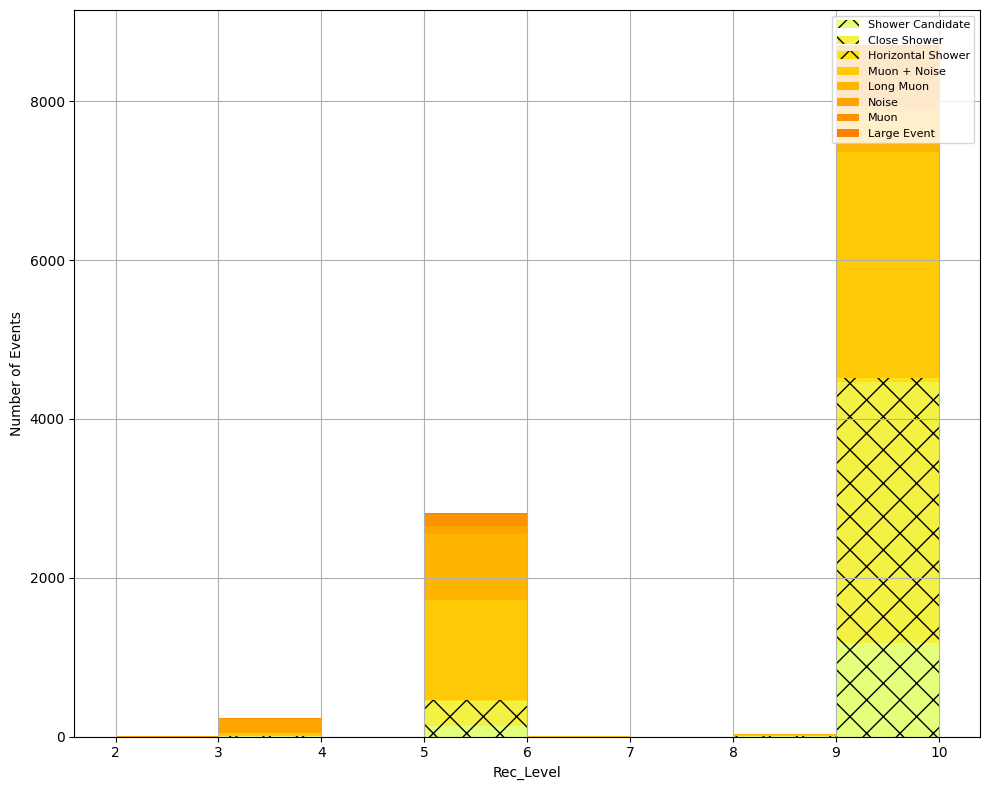

In [98]:
Plot_Value = 'Rec_Level'

plt.figure(figsize = [10,8])
labels = Classes_all

hist_data = [Data[Data.Shower_Class == thing][Plot_Value] for thing in labels]
bars = plt.hist(hist_data, bins = 8, stacked = True, color = colors, label = labels)

for rects ,clss in zip(bars[2], labels):
    if clss in Classes_shower:
        for rect in rects:
            rect.set_hatch('x')

# Plot Setup
plt.xlabel(Plot_Value)
plt.ylabel('Number of Events')
# plt.yscale('log')
plt.legend(Classes_all, loc = 'upper right', fontsize = 8)
plt.grid()
plt.tight_layout()
# plt.ylim(0,100)




Shower Candidate  68%: 1.3498736000000005
Close Shower      68%: 2.7422872000000003
Horizontal Shower 68%: 6.559566000000001
Muon + Noise      68%: 6.338778400000002
Long Muon         68%: 91.96828000000002
Noise             68%: 96.48804400000002
Muon              68%: 7.092534000000001
Large Event       68%: 77.332776


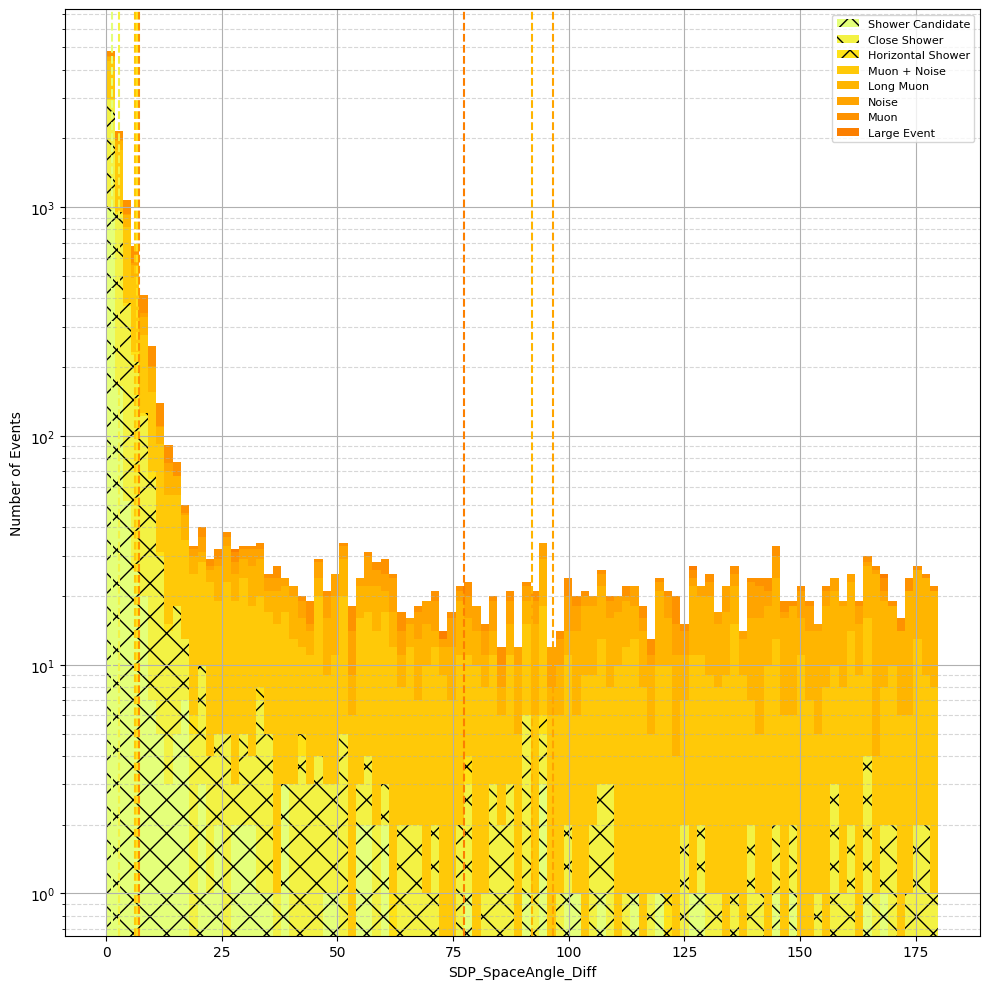

In [103]:
Plot_Value = 'SDP_SpaceAngle_Diff'

plt.figure(figsize = [10,10])
hist_data = [Data[Data.Shower_Class == thing][Plot_Value] for thing in Classes_all]
bars = plt.hist(hist_data, bins = 100, stacked = True, color = colors, label = Classes_all)

for rects ,clss in zip(bars[2], Classes_all):
    if clss in Classes_shower:
        for rect in rects:
            rect.set_hatch('x')

# Plot Setup
plt.xlabel(Plot_Value)
plt.ylabel('Number of Events')
plt.yscale('log')
# plt.title('SDP Space Angle Difference')
plt.legend(Classes_all, loc = 'upper right', fontsize = 8)
plt.grid(which='major')
plt.grid(which='minor', linestyle='--',alpha = 0.5)
plt.tight_layout()
# plt.ylim(0,100)


# Count the 68 percentile for each class
def Percentile_68(data):
    return np.percentile(np.abs(data), 68)

maxlen = max(len(c) for c in Classes_all)
for clss in Classes_all:
    print(f'{clss.ljust(maxlen)} 68%: {Percentile_68(Data[Data.Shower_Class == clss][Plot_Value])}')

for clss in Classes_all:
    plt.axvline(x=Percentile_68(Data[Data.Shower_Class == clss][Plot_Value]), color = colors[Classes_all.index(clss)], linestyle = '--', label = clss + ' 68%')

Shower Candidate  68%: 5.321128800000002
Close Shower      68%: 2.9525536
Horizontal Shower 68%: 9.108229600000001
Muon + Noise      68%: 7.751137200000007
Long Muon         68%: 39.84532
Noise             68%: 109.1888
Muon              68%: 6.004664000000005
Large Event       68%: 96.991444


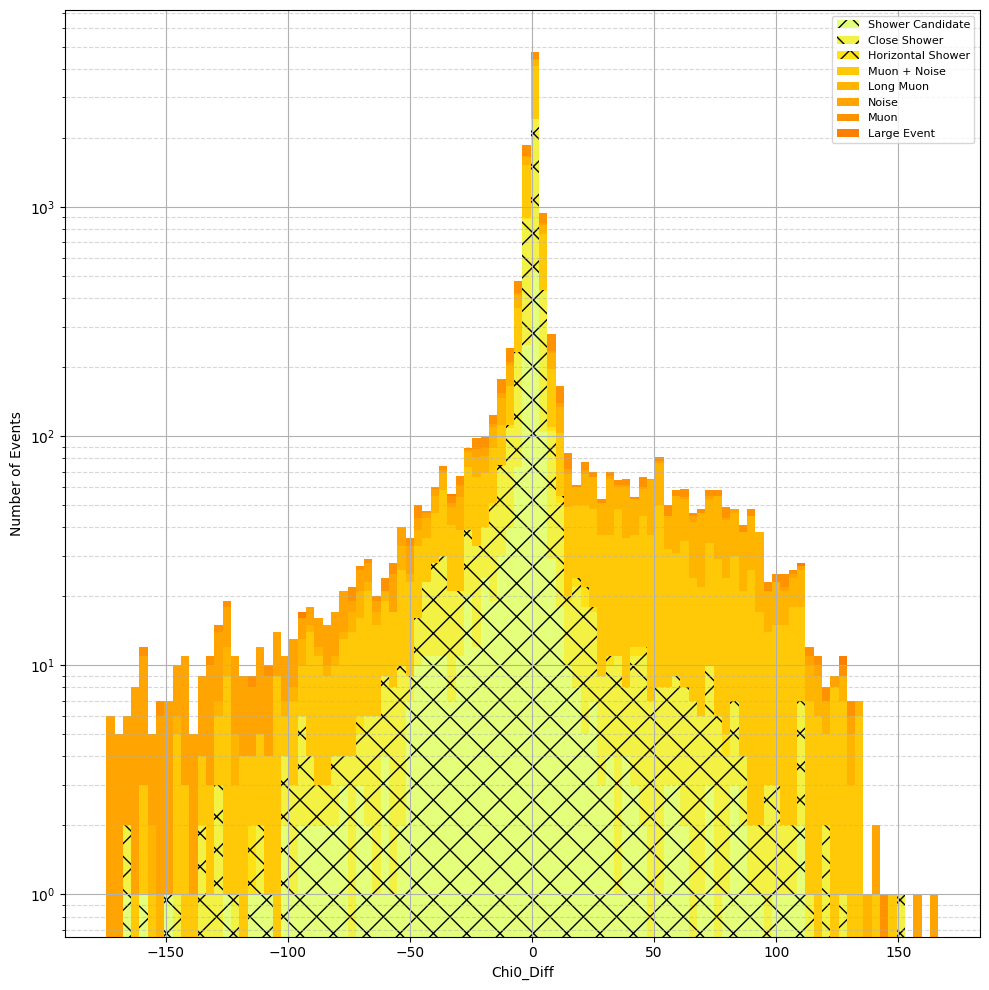

In [104]:
Plot_Value = 'Chi0_Diff'

plt.figure(figsize = [10,10])
hist_data = [Data[Data.Shower_Class == thing][Plot_Value] for thing in Classes_all]
bars = plt.hist(hist_data, bins = 100, stacked = True, color = colors, label = Classes_all)

for rects ,clss in zip(bars[2], Classes_all):
    if clss in Classes_shower:
        for rect in rects:
            rect.set_hatch('x')

# Plot Setup
plt.xlabel(Plot_Value)
plt.ylabel('Number of Events')
plt.yscale('log')
# plt.title('SDP Space Angle Difference')
plt.legend(Classes_all, loc = 'upper right', fontsize = 8)
plt.grid(which='major')
plt.grid(which='minor', linestyle='--',alpha = 0.5)
plt.tight_layout()
# plt.ylim(0,100)


# Count the 68 percentile for each class
def Percentile_68(data):
    return np.percentile(np.abs(data), 68)

maxlen = max(len(c) for c in Classes_all)
for clss in Classes_all:
    print(f'{clss.ljust(maxlen)} 68%: {Percentile_68(Data[Data.Shower_Class == clss][Plot_Value])}')
    # plt.axvline(x=Percentile_68(Data[Data.Shower_Class == clss][Plot_Value]), color = colors[Classes_all.index(clss)], linestyle = '--', label = clss + ' 68%')
    # plt.axvline(x=-Percentile_68(Data[Data.Shower_Class == clss][Plot_Value]), color = colors[Classes_all.index(clss)], linestyle = '--', label = clss + ' 68%')

Shower Candidate  68%: 99.91974400000001
Close Shower      68%: 123.70476
Horizontal Shower 68%: 284.79880000000026
Muon + Noise      68%: 223.97392
Long Muon         68%: 312.80760000000004
Noise             68%: 1906.2004
Muon              68%: 348.27100000000036
Large Event       68%: 855.6454800000001


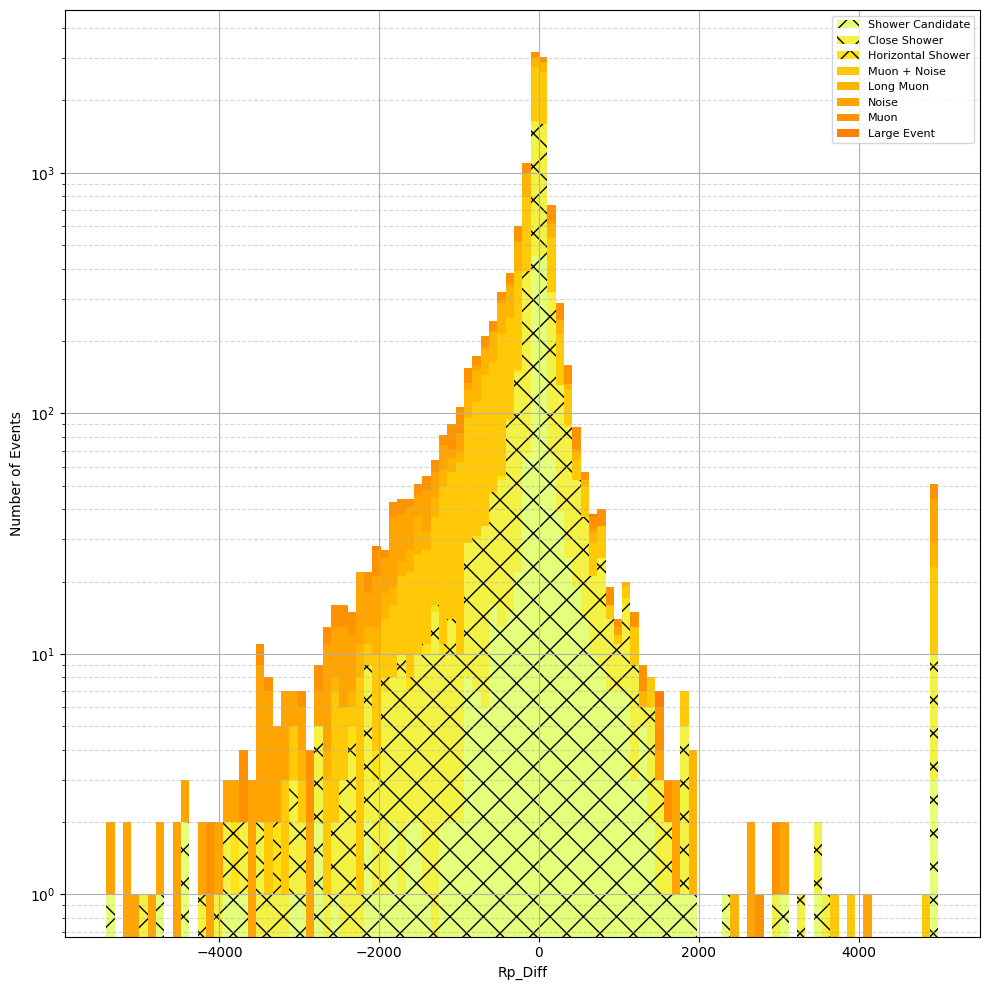

In [105]:
Plot_Value = 'Rp_Diff'

plt.figure(figsize = [10,10])
hist_data = [np.array(Data[Data.Shower_Class == thing][Plot_Value]).clip(max = 5000) for thing in Classes_all]
bars = plt.hist(hist_data, bins = 100, stacked = True, color = colors, label = Classes_all)

for rects ,clss in zip(bars[2], Classes_all):
    if clss in Classes_shower:
        for rect in rects:
            rect.set_hatch('x')

# Plot Setup
plt.xlabel(Plot_Value)
plt.ylabel('Number of Events')
plt.yscale('log')
# plt.title('SDP Space Angle Difference')
plt.legend(Classes_all, loc = 'upper right', fontsize = 8)
plt.grid(which='major')
plt.grid(which='minor', linestyle='--',alpha = 0.5)
plt.tight_layout()
# plt.ylim(0,100)


# Count the 68 percentile for each class
def Percentile_68(data):
    return np.percentile(np.abs(data), 68)

maxlen = max(len(c) for c in Classes_all)
for clss in Classes_all:
    print(f'{clss.ljust(maxlen)} 68%: {Percentile_68(Data[Data.Shower_Class == clss][Plot_Value])}')
    # plt.axvline(x=Percentile_68(Data[Data.Shower_Class == clss][Plot_Value]), color = colors[Classes_all.index(clss)], linestyle = '--', label = clss + ' 68%')
    # plt.axvline(x=-Percentile_68(Data[Data.Shower_Class == clss][Plot_Value]), color = colors[Classes_all.index(clss)], linestyle = '--', label = clss + ' 68%')

Shower Candidate  68%: 4.057158
Close Shower      68%: 2.2102012
Horizontal Shower 68%: 2.3037944
Muon + Noise      68%: 4.6834960000000025
Long Muon         68%: 165.4784
Noise             68%: 2.887713600000004
Muon              68%: 2.758906000000001
Large Event       68%: 155.13964


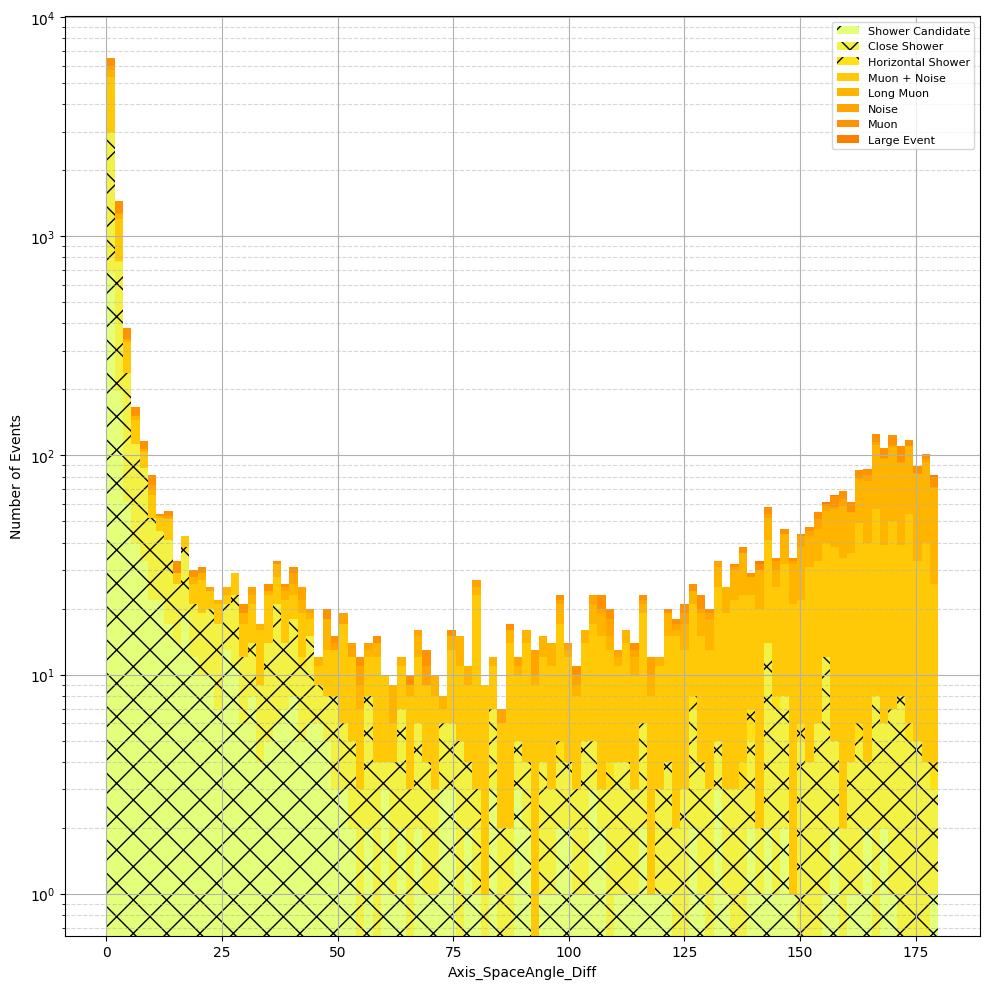

In [106]:
Plot_Value = 'Axis_SpaceAngle_Diff'

plt.figure(figsize = [10,10])
hist_data = [Data[Data.Shower_Class == thing][Plot_Value] for thing in Classes_all]
bars = plt.hist(hist_data, bins = 100, stacked = True, color = colors, label = Classes_all)

for rects ,clss in zip(bars[2], Classes_all):
    if clss in Classes_shower:
        for rect in rects:
            rect.set_hatch('x')

# Plot Setup
plt.xlabel(Plot_Value)
plt.ylabel('Number of Events')
plt.yscale('log')
# plt.title('SDP Space Angle Difference')
plt.legend(Classes_all, loc = 'upper right', fontsize = 8)
plt.grid(which='major')
plt.grid(which='minor', linestyle='--',alpha = 0.5)
plt.tight_layout()
# plt.ylim(0,100)


# Count the 68 percentile for each class
def Percentile_68(data):
    return np.percentile(np.abs(data), 68)

maxlen = max(len(c) for c in Classes_all)
for clss in Classes_all:
    print(f'{clss.ljust(maxlen)} 68%: {Percentile_68(Data[Data.Shower_Class == clss][Plot_Value])}')
    # plt.axvline(x=Percentile_68(Data[Data.Shower_Class == clss][Plot_Value]), color = colors[Classes_all.index(clss)], linestyle = '--', label = clss + ' 68%')
    # plt.axvline(x=-Percentile_68(Data[Data.Shower_Class == clss][Plot_Value]), color = colors[Classes_all.index(clss)], linestyle = '--', label = clss + ' 68%')